遷移學習 Mango Classification

### Import必要套件

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/TFkeras/mango.zip' /content

In [ ]:
!unzip /content/mango.zip -d /content/

串流輸出內容已截斷至最後 5000 行。
  inflating: /content/mango/Train/00874.jpg  
  inflating: /content/mango/Train/00875.jpg  
  inflating: /content/mango/Train/00876.jpg  
  inflating: /content/mango/Train/00877.jpg  
  inflating: /content/mango/Train/00878.jpg  
  inflating: /content/mango/Train/00879.jpg  
  inflating: /content/mango/Train/00880.jpg  
  inflating: /content/mango/Train/00881.jpg  
  inflating: /content/mango/Train/00883.jpg  
  inflating: /content/mango/Train/00885.jpg  
  inflating: /content/mango/Train/00886.jpg  
  inflating: /content/mango/Train/00887.jpg  
  inflating: /content/mango/Train/00888.jpg  
  inflating: /content/mango/Train/00889.jpg  
  inflating: /content/mango/Train/00892.jpg  
  inflating: /content/mango/Train/00893.jpg  
  inflating: /content/mango/Train/00894.jpg  
  inflating: /content/mango/Train/00895.jpg  
  inflating: /content/mango/Train/00896.jpg  
  inflating: /content/mango/Train/00897.jpg  
  inflating: /content/mango/Train/00898.jpg  
  inflating: 

In [ ]:
image_size = [224, 224]
batch_size = 64

### mango 分A B C 等級
載入mango數據集 從 csv檔

In [ ]:
train_dir = '/content/mango/Train/'
test_dir = '/content/mango/Dev/'
dftrain = pd.read_csv(r'/content/mango/train.csv')
dftest = pd.read_csv(r'/content/mango/dev.csv')
print(dftrain.shape, dftest.shape)
print(dftrain.head())

(5600, 2) (800, 2)
    image_id label
0  00002.jpg     C
1  00003.jpg     C
2  00004.jpg     B
3  00005.jpg     A
4  00007.jpg     A


In [ ]:
le = LabelEncoder()
dftrain['le'] = le.fit_transform(dftrain['label'])
dftest['le'] = le.transform(dftest['label'])
print(list(le.classes_))
print(dftrain['le'].to_numpy().tolist())

['A', 'B', 'C']
[2, 2, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 0, 0, 1, 0, 2,

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="training",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 4480 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Train",
      validation_split=0.2,
      subset="validation",
      seed=1001,
      labels=dftrain['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 5600 files belonging to 3 classes.
Using 1120 files for validation.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
      "mango/Dev",
      validation_split=0.0,
      shuffle=False,
      seed=1001,
      labels=dftest['le'].to_numpy().tolist(),
      image_size=image_size,
      batch_size=None,
)

Found 800 files belonging to 3 classes.


In [ ]:
for x, y in train_ds.take(1):
  print(x)
  print(y)

tf.Tensor(
[[[ 85.    236.    193.   ]
  [ 96.5   234.5   193.   ]
  [121.375 227.25  183.5  ]
  ...
  [ 56.     70.     81.   ]
  [ 56.25   70.25   81.25 ]
  [ 51.75   65.75   76.75 ]]

 [[ 89.125 234.375 191.   ]
  [ 94.875 235.25  193.125]
  [117.25  228.5   186.75 ]
  ...
  [ 47.     56.875  66.25 ]
  [ 42.875  52.75   61.75 ]
  [ 41.875  51.75   60.75 ]]

 [[101.625 228.75  188.25 ]
  [101.875 231.875 196.   ]
  [116.375 226.125 188.   ]
  ...
  [ 34.875  39.875  44.125]
  [ 30.     35.     39.25 ]
  [ 28.     33.     37.25 ]]

 ...

 [[ 91.875 103.875 101.875]
  [ 90.375 102.375 100.375]
  [ 87.25   99.25   97.25 ]
  ...
  [204.75  175.75  177.75 ]
  [199.625 170.625 172.625]
  [203.    174.    176.   ]]

 [[ 84.5    96.5    94.5  ]
  [ 84.25   96.25   94.25 ]
  [ 86.125  98.125  96.125]
  ...
  [209.25  180.25  182.25 ]
  [199.75  170.75  172.75 ]
  [200.5   171.5   173.5  ]]

 [[ 81.125  93.125  91.125]
  [ 83.     95.     93.   ]
  [ 85.     97.     95.   ]
  ...
  [218.    19

In [ ]:
print(train_ds.class_names)

[0, 1, 2]


In [ ]:
# initializing label list and feeding in classes/indices
labels = train_ds.class_names

In [ ]:
labels

[0, 1, 2]

In [ ]:
def flip(x):
    """
    flip image(翻轉影像)
    """
    x = tf.image.random_flip_left_right(x)  # 隨機左右翻轉影像
    return x

def color(x):
    """
     Color change(改變顏色)
    """
    x = tf.image.random_hue(x, 0.08)  # 隨機調整影像色調
    x = tf.image.random_saturation(x, 0.6, 1.6)  # 隨機調整影像飽和度
    x = tf.image.random_brightness(x, 0.05)  # 隨機調整影像亮度
    x = tf.image.random_contrast(x, 0.7, 1.3)  # 隨機調整影像對比度
    return x

def rotate(x):
    """
    Rotation image(影像旋轉)
    """
    # 隨機選轉n次(通過minval和maxval設定n的範圍)，每次選轉90度
    x = tf.image.rot90(x, tf.random.uniform(shape=[], minval=1, maxval=4, dtype=tf.int32))
    return x

def zoom(x, scale_min=0.6, scale_max=1.4):
    """
    Zoom Image(影像縮放)
    """
    h, w, c = x.shape
    scale = tf.random.uniform([], scale_min, scale_max)  # 隨機縮放比例
    sh = h * scale  # 縮放後影像長度
    sw = w * scale  # 縮放後影像寬度
    x = tf.image.resize(x, (sh, sw))  # 影像縮放
    x = tf.image.resize_with_crop_or_pad(x, h, w)  # 影像裁減和填補
    return x

def parse_aug_fn(x, y):
    """
    Image Augmentation(影像增強) function
    """
    x = tf.cast(x, tf.float32)
    x = tf.keras.applications.inception_v3.preprocess_input(x) ## 更正
    x = flip(x)  # 隨機水平翻轉
    # 觸發顏色轉換機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: color(x), lambda: x) # tf.cond: tensorflow的if / else條件判斷式
    # 觸發影像旋轉機率0.25%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.75, lambda: rotate(x), lambda: x)
    # 觸發影像縮放機率50%
    x = tf.cond(tf.random.uniform([], 0, 1) > 0.5, lambda: zoom(x), lambda: x)
    return x, tf.one_hot(y, 3)

def parse_fn(x, y):
    x = tf.cast(x, tf.float32)  # 影像標準化
    x = tf.keras.applications.inception_v3.preprocess_input(x) ## 更正
    return x, tf.one_hot(y, 3)

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式

train_ds = train_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
train_ds = train_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

val_ds = val_ds.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
val_ds = val_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

test_ds = test_ds.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)。
test_ds = test_ds.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

### 訓練Model

In [ ]:
# # 創建模型(不包含全連接層和預訓練權重)，最後一層卷積加上GlobalAveragePooling
# base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False,
#                                                weights='imagenet',
#                                                pooling='avg',
#                                                input_shape=image_size+[3])
# # 將剛創建的InceptionV3模型接上兩層全連接層，並且最後一層使用Softmax輸出
# model = tf.keras.Sequential([
#     base_model,
#     layers.Dense(128, activation='relu'),
#     layers.Dense(3, activation='softmax')
# ])

base_model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = layers.GlobalAveragePooling2D()(x) # flatten() 2d -> 1d
x = layers.Dense(128, activation='relu')(x)
predictions = layers.Dense(3, activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 22065443 (84.17 MB)
Trainable params: 22031011 (84.04 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [ ]:
# 儲存最好的網路模型權重
model_mckp = keras.callbacks.ModelCheckpoint('/content/drive/My Drive/TFkeras/incv3man.keras',
                                             monitor='val_categorical_accuracy',
                                             save_best_only=True,
                                             mode='max')
# 設定停止訓練的條件(當Accuracy超過5迭代沒有上升的話訓練會終止)
model_esp = keras.callbacks.EarlyStopping(monitor='val_categorical_accuracy', patience=5)

In [ ]:
adam = optimizers.Adam(learning_rate=1e-3)
rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

model.compile(optimizer=adam,
                loss='categorical_crossentropy',
                metrics=['categorical_accuracy'])

In [ ]:
history = model.fit(train_ds,
                        validation_data=val_ds,
                        epochs=30,
                        callbacks=[rlr, model_mckp, model_esp])

Epoch 1/30
70/70 [==============================] - 104s 720ms/step - loss: 0.7449 - categorical_accuracy: 0.6567 - val_loss: 21.1940 - val_categorical_accuracy: 0.4295 - lr: 0.0010
Epoch 2/30
70/70 [==============================] - 49s 645ms/step - loss: 0.6055 - categorical_accuracy: 0.7310 - val_loss: 1.9313 - val_categorical_accuracy: 0.5723 - lr: 0.0010
Epoch 3/30
70/70 [==============================] - 54s 714ms/step - loss: 0.5635 - categorical_accuracy: 0.7471 - val_loss: 0.9422 - val_categorical_accuracy: 0.6598 - lr: 0.0010
Epoch 4/30
70/70 [==============================] - 52s 659ms/step - loss: 0.5706 - categorical_accuracy: 0.7480 - val_loss: 0.8567 - val_categorical_accuracy: 0.6839 - lr: 0.0010
Epoch 5/30
70/70 [==============================] - 54s 701ms/step - loss: 0.5533 - categorical_accuracy: 0.7429 - val_loss: 0.6475 - val_categorical_accuracy: 0.7250 - lr: 0.0010
Epoch 6/30
70/70 [==============================] - 49s 650ms/step - loss: 0.5500 - categorical_ac

In [ ]:
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
import itertools

def get_conf_matrix(model, size, image_size):
    predictions =[]
    true_y = []
    for x,y in test_ds:
        predprob = model.predict(x)
        # decoding one-hot
        prediction = np.argmax(predprob, axis=1)
        y = np.argmax(y, axis =1)

        predictions = np.concatenate((predictions, prediction))
        true_y = np.concatenate((true_y, y))
        if len(predictions) >=size:
            break
    matrix = confusion_matrix(true_y, predictions)

    return matrix

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/TFkeras/incv3man.keras')
conf_matrix_inc = get_conf_matrix(model, 800, image_size)
print(conf_matrix_inc[:,:])
del model
K.clear_session()

1/1 [==============================] - 0s 33ms/step
[[192  51   0]
 [ 49 228  16]
 [  2  33 229]]


Confusion matrix, without normalization
[[192  51   0]
 [ 49 228  16]
 [  2  33 229]]


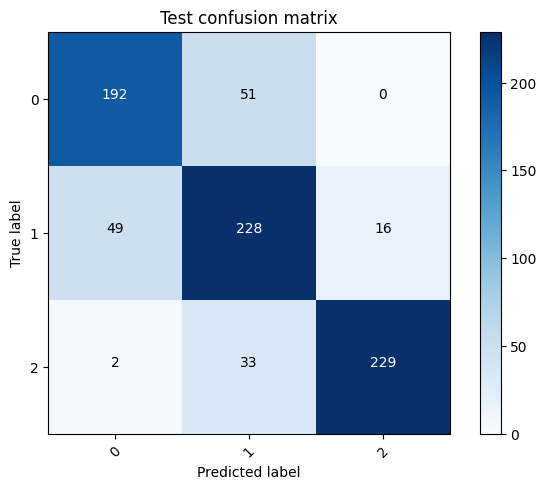

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=False`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(conf_matrix_inc, labels, title = "Test confusion matrix")

In [ ]:
sum([conf_matrix_inc[i, i] for i in range(3)])/800.0

0.81125